<a href="https://colab.research.google.com/github/isiri01/Early-Diabetic-Foot-Ulcer-Detection-using-Thermograms/blob/main/Training_and_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data/train',
    seed=123,
    image_size=(180, 80),
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data/val',
    seed=123,
    image_size=(180, 80),
    batch_size=32)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data/test',
    image_size=(180, 80),
    batch_size=32)

Found 1800 files belonging to 6 classes.
Found 600 files belonging to 6 classes.
Found 600 files belonging to 6 classes.


In [31]:
class_names = train_ds.class_names
print(class_names)

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5']


In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Layer 1: Conv2D (7x7, 32 filters)
model.add(layers.Conv2D(32, (7, 7), input_shape=(180,80,3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Layer 2: MaxPooling2D (3x3, stride 2)
model.add(layers.MaxPooling2D((3, 3), strides=2))

# Layer 3: Conv2D (5x5, 64 filters)
model.add(layers.Conv2D(64, (5, 5)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Layer 4: MaxPooling2D (5x5, stride 2)
model.add(layers.MaxPooling2D((5, 5), strides=2))

# Layer 5: Conv2D (7x7, 128 filters)
model.add(layers.Conv2D(128, (7, 7)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

# Layer 6: MaxPooling2D (7x7, stride 2)
model.add(layers.MaxPooling2D((7, 7), strides=2))

# Layer 7: Dropout
model.add(layers.Dropout(0.5))

# Layer 8: Flatten and Dense (Linear layer)
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))



In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 174, 74, 32)       4736      
                                                                 
 batch_normalization_6 (Bat  (None, 174, 74, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_6 (ReLU)              (None, 174, 74, 32)       0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 86, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 82, 32, 64)        51264     
                                                                 
 batch_normalization_7 (Bat  (None, 82, 32, 64)       

In [38]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
57/57 [==============================] - 2s 34ms/step - loss: 0.0579 - accuracy: 0.9800 - val_loss: 0.2076 - val_accuracy: 0.9433
Epoch 2/100
57/57 [==============================] - 2s 33ms/step - loss: 0.0596 - accuracy: 0.9844 - val_loss: 0.1944 - val_accuracy: 0.9383
Epoch 3/100
57/57 [==============================] - 2s 35ms/step - loss: 0.0482 - accuracy: 0.9806 - val_loss: 0.2765 - val_accuracy: 0.9250
Epoch 4/100
57/57 [==============================] - 2s 36ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.2043 - val_accuracy: 0.9433
Epoch 5/100
57/57 [==============================] - 2s 37ms/step - loss: 0.0591 - accuracy: 0.9761 - val_loss: 0.2970 - val_accuracy: 0.9283
Epoch 6/100
57/57 [==============================] - 2s 33ms/step - loss: 0.0533 - accuracy: 0.9778 - val_loss: 0.3457 - val_accuracy: 0.9100
Epoch 7/100
57/57 [==============================] - 2s 33ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.2315 - val_accuracy: 0.9350
Epoch 

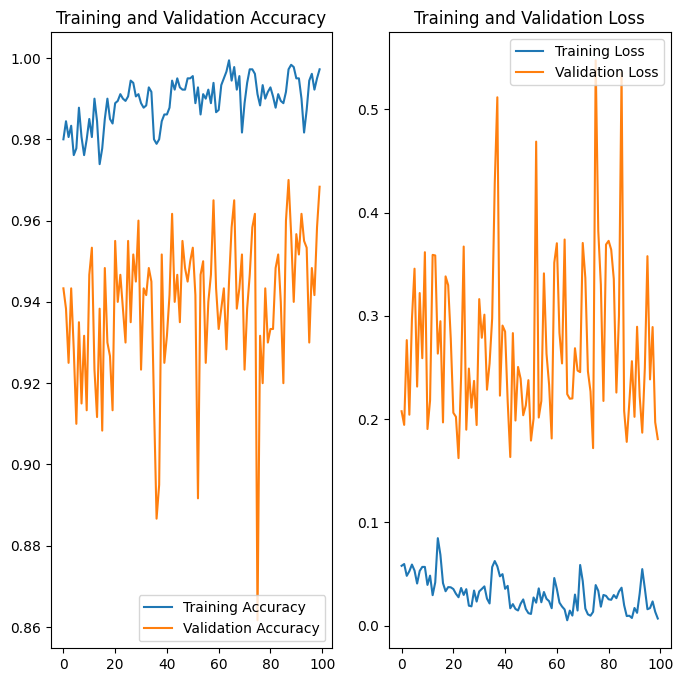

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')

19/19 [==============================] - 77s 2s/step - loss: 0.2239 - accuracy: 0.9650
Test accuracy: 0.9649999737739563


In [49]:
model.save('/content/drive/MyDrive/model.h5')

1/1 [==============================] - 0s 102ms/step


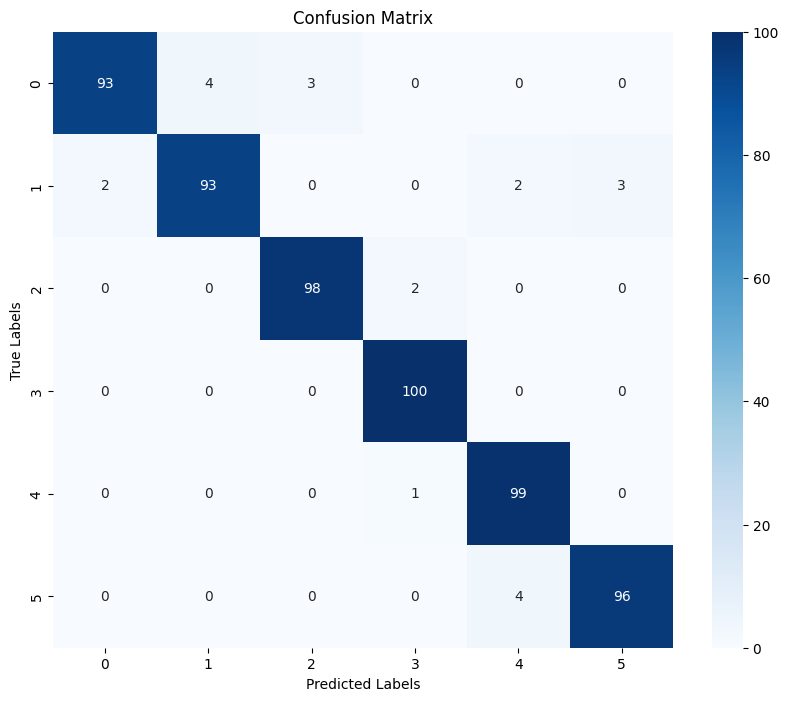

In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset creation, model definition, and training code here

# Predicting on the test dataset
test_labels = []
test_predictions = []

for images, labels in test_ds:
    preds = model.predict(images)
    test_predictions.extend(np.argmax(preds, axis=1))
    test_labels.extend(labels.numpy())

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
